In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd








In [ ]:

# Importing the dataset
dataset = pd.read_csv(r"C:\Users\HP\Downloads\Social_Network_Ads.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score


In [6]:
ac = accuracy_score(y_test, y_pred)
print(f"accuracy is {ac}")

accuracy is 0.95


In [7]:
f_score= f1_score(y_test, y_pred)
print(f"the F1 score is {f_score}")

the F1 score is 0.9130434782608695


In [8]:
precision= precision_score(y_test, y_pred)
print(f"the precision is {precision}")

the precision is 0.875


In [9]:
recall =recall_score(y_test,y_pred)
print(f"the recall is {recall}")

the recall is 0.9545454545454546


In [10]:

Cmatrix = confusion_matrix(y_test, y_pred)
print(f"the confusion Matrix is {Cmatrix}")

the confusion Matrix is [[55  3]
 [ 1 21]]


In [11]:
import seaborn as sns

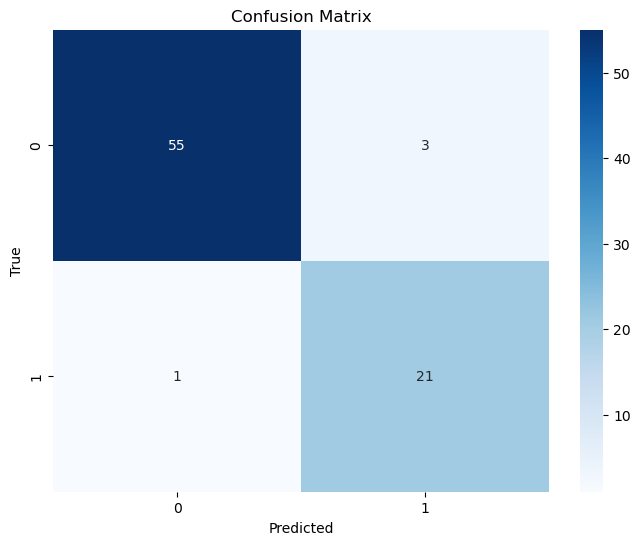

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(Cmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-9-c2c581ee46ca>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


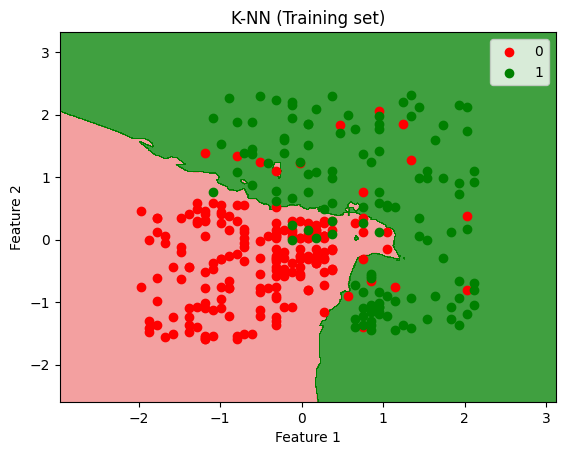

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Visualizing the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightcoral', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
